# An analysis of housing data in King County Washington.

### Presented by: Data Chef Partners

 Objective: To help realtors identify profitable areas in their chosen county so they can help their customers buy or sell with confidence<br>
#### Families:
- Get more house for their money
- Make an investment for future gains 
- Possible rental opportunities<br>
#### Contractors
- identify hotspots for flip opportunities
- identify areas of future development for new construction ventures
- Find customers looking to rennovate<br>
#### Investors
- Identify the gold standard of house for investment opportunities


In [1]:
# Setting up the workspace by importing all of the necessary libraries.
from importlib import reload

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import folium
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn import metrics

import scipy.stats as stats
warnings.filterwarnings('ignore')
import helper_functions as hf
reload(hf)

<module 'helper_functions' from 'C:\\Users\\Owner\\Desktop\\Data Science\\Flatiron_Projects\\mod_1_project\\dsc-v2-mod1-final-project-online-ds-ft-090919\\helper_functions.py'>

# Loading the data

In [ ]:
# Loading the data and getting a first look at it's structure and contents
df = pd.read_csv('kc_house_data.csv')
df.head(10)

In [ ]:
# Taking a look at the types of data and the information about the different columns
# Identifying extraneous values that may need to be removed or altered for cleaner processing
df.info()

In [ ]:
df.describe()

### Initial Data impressions:<br>
- __*id*__ is simply an identifier<br>
    This will be removed as it is not pertinent to the data analysis.<br>
- __*date*__ is a string.<br>
    Our initial impression is that it reflects sale dates for the property.<br>
    This should be converted to a numerical value for processing.<br>
- There are two columns related to the size, __*sqft_living and sqft_lot*__ <br>
    We will explore their relationship and determine if they are dependent on each other or not<br>
- __*floors*__ is a numerical value.<br>
    Based on our knowledge of houses we believe this may be better suited to a categorical value.<br>
    We will explore the data and convert it to either a single or multiple<br> 
    or decide if each value of floors needs it's own category.<br>
- __*waterfront*__ is definitely categorical sine a home can only be either on or off the water.<br>
    We will convert this to a binary value to represent either on or off the water.<br>
- __*sqft_basement*__ <br>
    This along with __*sqft_above*__ combined are the same as __*sqft_living*__ so we will drop it<br>
    from the dataset since the presence of a basement is more significant than the size.<br>
    'sqft_basement will then be converted to categories which will identify the presence of a basement<br>
- __*zipcode*__ and __*lat long*__ are both location data.<br>
    We will determine if both are necessary and treat them accordingly<br>
- __*yr_renovated*__ has many null values so they will be replaced.<br>
    we will replace both the null values and all 0's with the original year built.


### Scrubbing the Data!!

*Waterfront*

In [ ]:
# 'waterfront' is either True "1" or False "0".
# here we are changing all of the Null values to 0 to facilitate this
df['waterfront'] = df.waterfront.fillna(0)

*ID*

In [ ]:
# 'id' is an arbitrary value which is unnecesary for analysis
# here we are removing it from the dataset
df.drop(['id'], axis=1, inplace=True)



*View*

In [ ]:
# 'view' has some null values, so we will replace those with the assumption
#  that the null values represent the property not being viewed.
df['view'] = df.view.fillna(value = 0)

   *Sqft_basement*

In [ ]:
# 'sqft_basement' has some placeholders. Here we are removing those
# This also needs to be converted to numerical values for analysis
df.sqft_basement.replace(to_replace='?', value='0', inplace=True)
df.sqft_basement = df.sqft_basement.convert_objects(convert_numeric=True)

In [ ]:
df['yr_renovated'] = df.yr_renovated.fillna(value = 0)
df.yr_renovated = df.yr_renovated.replace(to_replace=0, value=df.yr_built)
    
        

In [ ]:
df['ren_period'] = 2015-df.yr_renovated

In [ ]:
df.ren_period.plot(kind='hist', bins=30)

In [ ]:
df.head()

In [ ]:
# converting to datetime for analysis
df['yr_renovated_dt'] = pd.to_datetime(df.yr_renovated.astype(int), format='%Y').dt.year
df.head(10)

In [ ]:
# converting 'date' to datetime format for processing
df['date_dt'] = pd.to_datetime(df.date)
df.head()

### Looking over the Clean, Shiny Data.

In [ ]:
df.describe()

## Saving cleaned DF as a CSV file for future use

In [ ]:
df.to_csv("cleaned_kc_house_data.csv", index=False)

# Visualizing the Data

In [2]:
dff = pd.read_csv("cleaned_kc_house_data.csv")

In [3]:
# Taking an initial look at the basic statistics of the data set
dff.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ren_period,yr_renovated_dt,date_dt
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,1955.0,98178,47.5112,-122.257,1340,5650,60.0,1955,2014-10-13
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,24.0,1991,2014-12-09
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,1933.0,98028,47.7379,-122.233,2720,8062,82.0,1933,2015-02-25
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,1965.0,98136,47.5208,-122.393,1360,5000,50.0,1965,2014-12-09
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,1987.0,98074,47.6168,-122.045,1800,7503,28.0,1987,2015-02-18


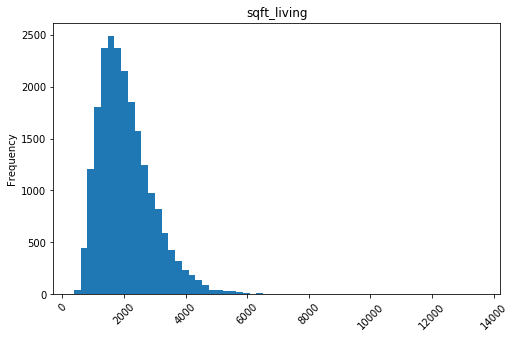

In [4]:
dff.sqft_living.plot(kind='hist', bins=60, title='sqft_living', figsize=(8,5), rot='45')

in the histogram above:
- __*sqft_living*__ as graphed above seems to indicate that the majority of the houses in this
    dataset are between 1000 sqft and 3000 sqft.
- There is a large amount between 3000 and 4500 which may be significant

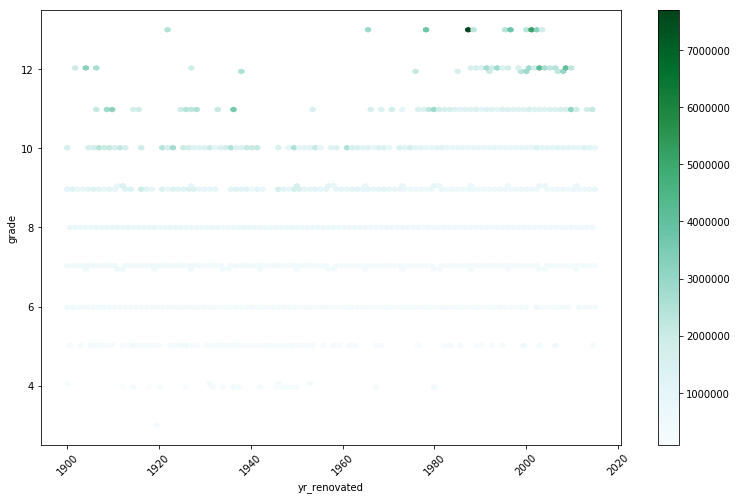

In [5]:
dff.plot.hexbin(x='yr_renovated', y='grade', C='price', figsize=(13,8),sharex=False, rot=45, legend=True)

In the hexbin plot above: 
- it appears that as the __*grade*__ of the house increases, the __*price*__ of the house also increases.
- It also appears that the __*yr_renovated*__ does not have much impact on the grade.

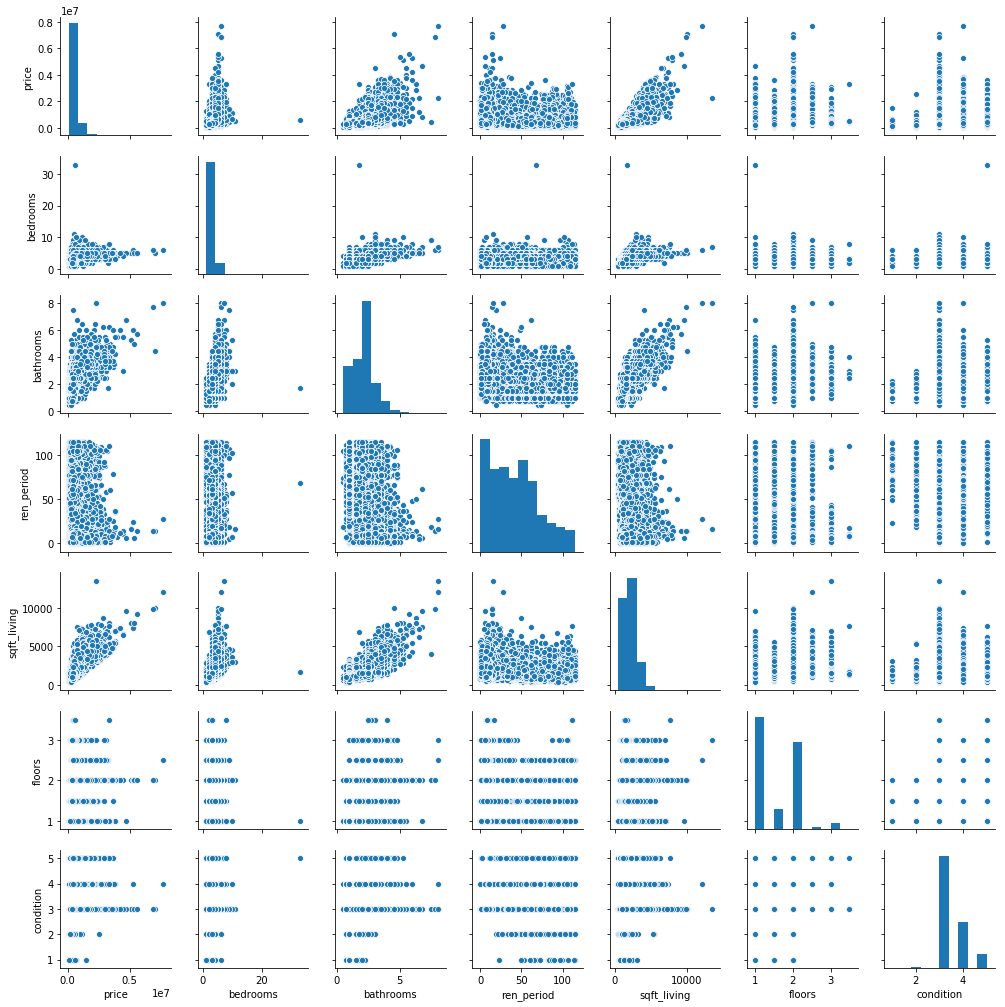

In [6]:
hf.make_pairplot(df=dff)

In the above pairplot, the following observations were made:
- __*bedrooms*__ seems to have a relationship with __*price,sqft_living, and bathrooms*__.
- __*sqft_lliving*__ and __*price*__ seem to have a linear relationship
- __*sqft_living and bathrooms*__ seem to have a direct correlation to each other.
- there are a few outliers that appear to be skewing the data, we will need to remove those.

#### Outliers have been identified and we will remove those for analysis
- __*bathrooms*__ above 10
- __*bedrooms*__ above 10
- __*sqft_living*__ above 10000
- __*grade*__ of 13 which is a top of the line custom home.

In [7]:
dff_working = dff.loc[(dff['bathrooms']< 10) & (dff['bedrooms']<10) & (dff['sqft_living']<10000) & (dff['grade']<13)]

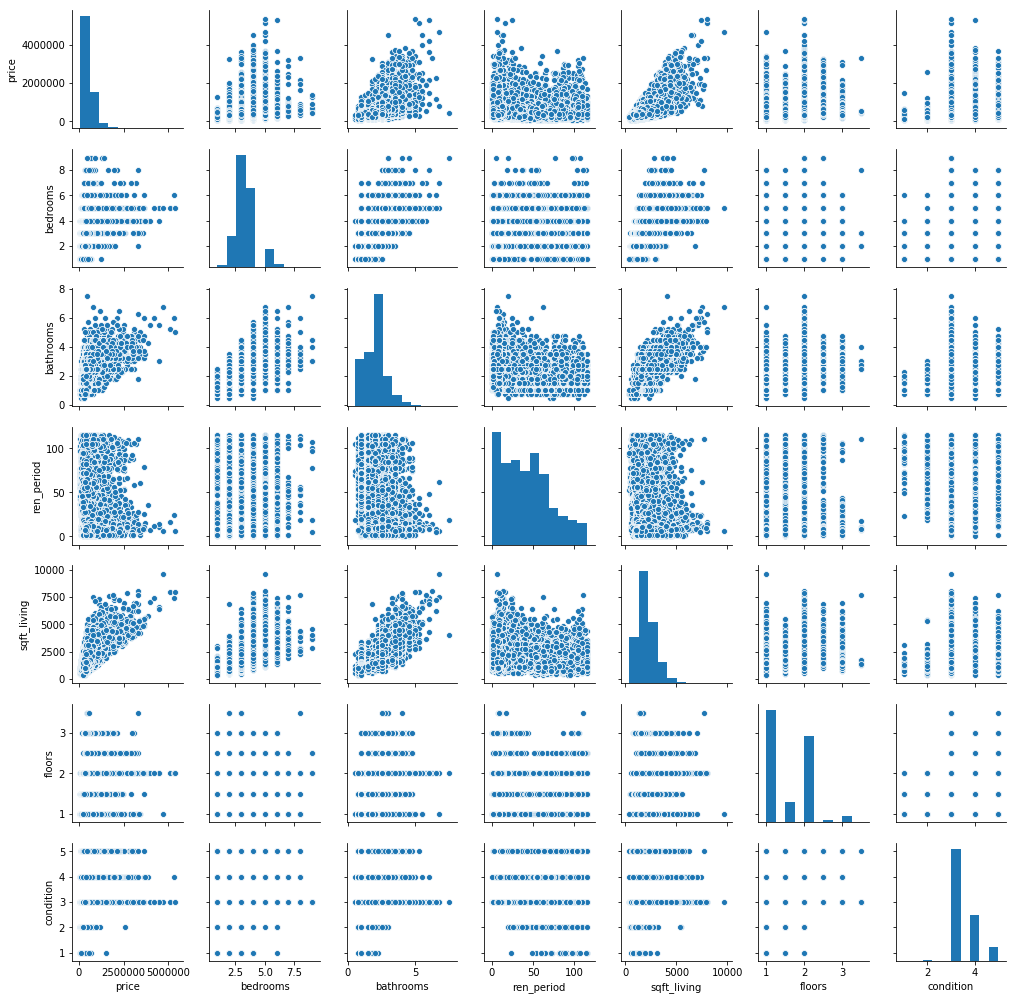

In [8]:
hf.make_pairplot(df=dff_working)

#### It appears that the cleaning we have done was successful.<br>


Text(0.5, 1.0, 'Price vs 1st group of column variables')

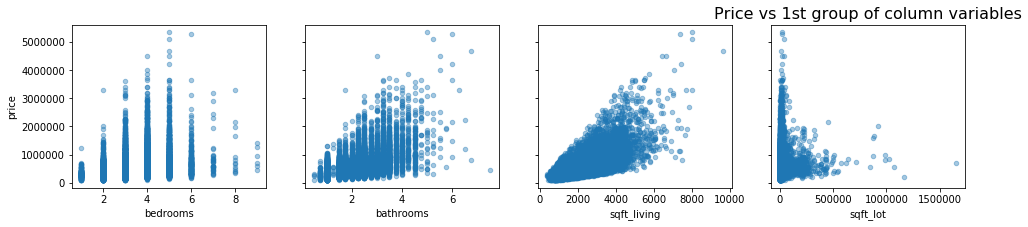

In [9]:

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(dff_working)[2:6], axes):
                    dff_working.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=.4, sharey=True)

plt.title('Price vs 1st group of column variables', fontsize = 16)


Text(0.5, 1.0, 'Price vs 2nd group of column variables')

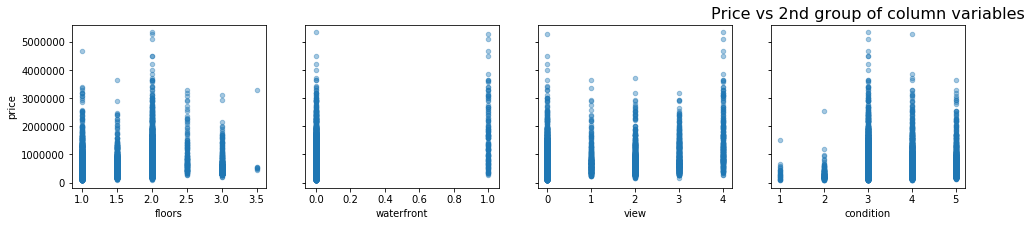

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(dff_working)[6:10], axes):
                    dff_working.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=.4, sharey=True)

plt.title('Price vs 2nd group of column variables', fontsize = 16)

Text(0.5, 1.0, 'Price vs 3rd group of column variables')

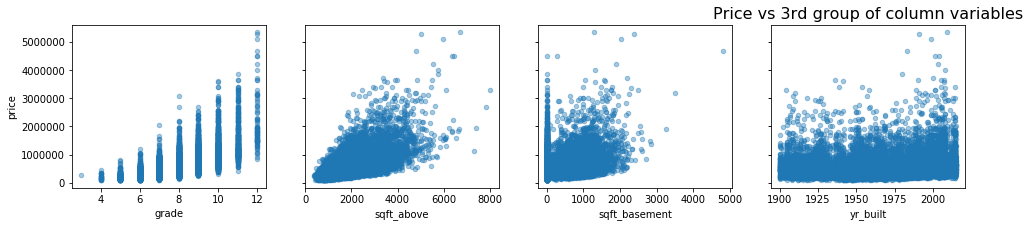

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(dff_working)[10:14], axes):
                    dff_working.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=.4, sharey=True)

plt.title('Price vs 3rd group of column variables', fontsize = 16)

Text(0.5, 1.0, 'Price vs 4th group of column variables')

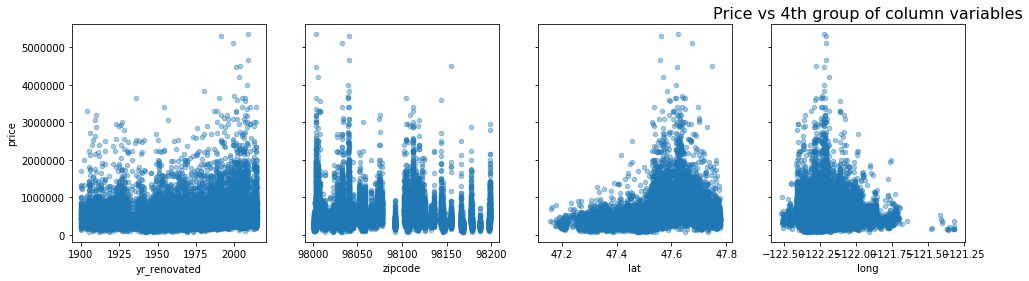

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
for xcol, ax in zip(list(dff_working)[14:18], axes):
                    dff_working.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=.4, sharey=True)

plt.title('Price vs 4th group of column variables', fontsize = 16)

Latitude and longitude seem to be related.  Let's plot them together to see what it looks like.

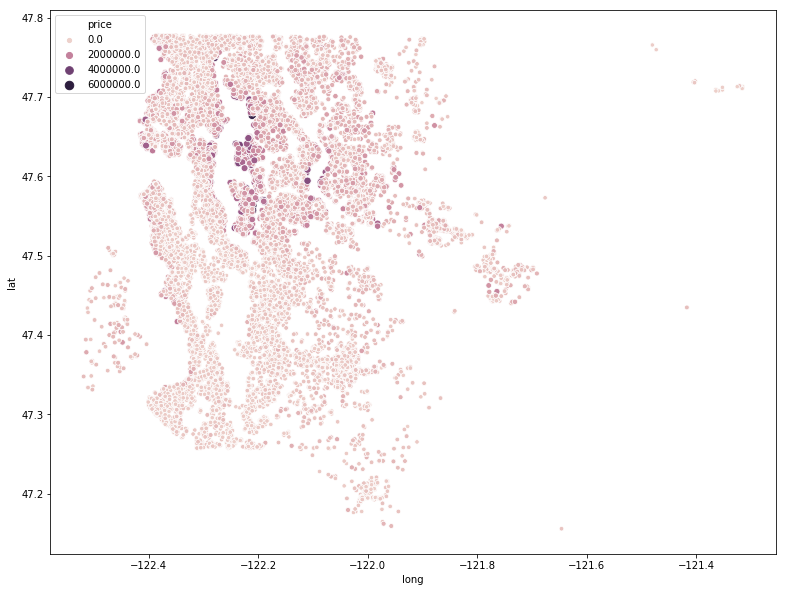

In [13]:
plt.figure(figsize=(13,10))
cmap = sns.cubehelix_palette(8, start=2, rot=.2, dark=0, light=.95, as_cmap=True)
sns.scatterplot(x='long', y='lat', data=dff_working, hue='price', size='price', cmap=cmap)

This plot seems to indicate that there is an area where high priced houses are concentrated.
We will use this information later.


### Looking at the plots above, we have determined that we will look further into:
- __*bathrooms*__
- __*sqft_living*__
- __*bedrooms*__
- __*lat & long*__ <br>
as they relate to our target __*price*__

### Now to check for Mulitcolilnearity
 using the Pearson test, we can look for high correlation between two variables<br>
 to determine if they represent the same data.<br> 
 We will look at the values at 75% or higher and determine if we should drop one 

In [14]:
dff_working.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ren_period,yr_renovated_dt
price,1.000000,0.317023,0.519933,0.694145,0.089552,0.260543,0.265816,0.393325,0.039477,0.671080,...,0.310729,0.056547,0.097201,-0.054612,0.315138,0.024754,0.591417,0.081518,-0.097201,0.097201
bedrooms,0.317023,1.000000,0.527105,0.595771,0.032444,0.182783,-0.002884,0.077864,0.023909,0.366000,...,0.299807,0.163118,0.170448,-0.159257,-0.012736,0.138042,0.405104,0.030592,-0.170448,0.170448
bathrooms,0.519933,0.527105,1.000000,0.752300,0.085717,0.503479,0.062835,0.179072,-0.126422,0.662993,...,0.269537,0.511151,0.534870,-0.206448,0.022645,0.227189,0.567555,0.085123,-0.534870,0.534870
sqft_living,0.694145,0.595771,0.752300,1.000000,0.171188,0.354880,0.102281,0.274856,-0.058755,0.761866,...,0.419707,0.323868,0.342546,-0.203195,0.050244,0.246208,0.759026,0.181622,-0.342546,0.342546
sqft_lot,0.089552,0.032444,0.085717,0.171188,1.000000,-0.005838,0.021295,0.073115,-0.008541,0.113479,...,0.011478,0.052650,0.051524,-0.129708,-0.086032,0.230125,0.143447,0.717503,-0.051524,0.051524
floors,0.260543,0.182783,0.503479,0.354880,-0.005838,1.000000,0.020412,0.026767,-0.263969,0.459392,...,-0.246564,0.490175,0.501038,-0.059987,0.048830,0.126302,0.279688,-0.011874,-0.501038,0.501038
waterfront,0.265816,-0.002884,0.062835,0.102281,0.021295,0.020412,1.000000,0.382008,0.017055,0.082295,...,0.081431,-0.023993,-0.007440,0.029822,-0.012530,-0.037786,0.083016,0.030597,0.007440,-0.007440
view,0.393325,0.077864,0.179072,0.274856,0.073115,0.026767,0.382008,1.000000,0.046509,0.244513,...,0.266582,-0.055428,-0.027988,0.085336,0.005126,-0.077826,0.275668,0.070520,0.027988,-0.027988
condition,0.039477,0.023909,-0.126422,-0.058755,-0.008541,-0.263969,0.017055,0.046509,1.000000,-0.146551,...,0.170137,-0.361572,-0.390110,0.002919,-0.015068,-0.105871,-0.092566,-0.002693,0.390110,-0.390110
grade,0.671080,0.366000,0.662993,0.761866,0.113479,0.459392,0.082295,0.244513,-0.146551,1.000000,...,0.158687,0.450485,0.460872,-0.187259,0.112715,0.202367,0.712389,0.119326,-0.460872,0.460872


In [15]:
abs(dff_working.corr()) >.75


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ren_period,yr_renovated_dt
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


- It looks like 'grade' is correlated with 'sqft_living', but this relationship should be expected
- 'bathrooms' and 'sqft_living15' seem to be correlated.  
  upon further inspection it seems to indicate that 'sqft_living15' may be the size before remodeling and sqft_living is the current size.  
  We will look at this closer  
- It looks like 'lat' and 'long' may have some importance, but they need to be used together.  
  We will separate them out for further inspection.

In [16]:
dff_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21577 entries, 0 to 21596
Data columns (total 23 columns):
date               21577 non-null object
price              21577 non-null float64
bedrooms           21577 non-null int64
bathrooms          21577 non-null float64
sqft_living        21577 non-null int64
sqft_lot           21577 non-null int64
floors             21577 non-null float64
waterfront         21577 non-null float64
view               21577 non-null float64
condition          21577 non-null int64
grade              21577 non-null int64
sqft_above         21577 non-null int64
sqft_basement      21577 non-null float64
yr_built           21577 non-null int64
yr_renovated       21577 non-null float64
zipcode            21577 non-null int64
lat                21577 non-null float64
long               21577 non-null float64
sqft_living15      21577 non-null int64
sqft_lot15         21577 non-null int64
ren_period         21577 non-null float64
yr_renovated_dt    21577 non-n

In [17]:
cols = ['bedrooms', 'bathrooms', 'ren_period', 'sqft_living', 'floors', 'condition']
hf.make_ols_model(df=dff_working, columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 2.164e+04
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:35:45   Log-Likelihood:            -2.9819e+05
No. Observations:               21577   AIC:                         5.964e+05
Df Residuals:                   21571   BIC:                         5.964e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -8.305e+04   2236.085    -37.140      

(<statsmodels.regression.linear_model.OLS at 0x28ef4279518>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x28ef42796a0>)

### Summary 1: All Columns
- Model
    - R2 is .85
        - but given the **multicollinearity** this number is highly unreliable
- Features
    - Our coefficients are also unreliable, since we have such high multicollinearity
    - Pvalues are all under 0.05
- Residuals
    - Skewed to the right, which means our line is below our data
    - Kurtosis is very high, which means our data is far away (35 standard deviations) from the line
    - Condition Number is infinity, which means we have multicollinearity

In [18]:
cols = ['grade', 'lat', 'condition']

hf.make_ols_model(df=dff_working, columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 3.733e+04
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:35:59   Log-Likelihood:            -2.9954e+05
No. Observations:               21577   AIC:                         5.991e+05
Df Residuals:                   21574   BIC:                         5.991e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade       2.085e+05   1530.778    136.191      0.0

(<statsmodels.regression.linear_model.OLS at 0x28ef4176278>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x28ef0f5e940>)

### Summary 2: Grade, Latitude and Condition
- Model
    - R2 is .83
        - but given the **multicollinearity** this number is highly unreliable
- Features
    - Our coefficients are also unreliable, since we have such high multicollinearity
    - Pvalues are all under 0.05
- Residuals
    - Still skewed to the right, which means our line is below our data
    - Kurtosis is very high, which means our data is far away (25 standard deviations) from the line
    - Condition Number is much better, but we still have multicollinearity

In [19]:
cols = ['waterfront', 'lat', 'bedrooms', 'condition']

hf.make_ols_model(df=dff_working, columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.622e+04
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:36:36   Log-Likelihood:            -3.0423e+05
No. Observations:               21577   AIC:                         6.085e+05
Df Residuals:                   21573   BIC:                         6.085e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
waterfront  1.152e+06   2.68e+04     42.992      0.0

(<statsmodels.regression.linear_model.OLS at 0x28ef41d7fd0>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x28ef41d7c88>)

### Summary 3: Waterfront, Latitude, Bedrooms, Condition
- Model
    - R2 is .75
        - but given the **multicollinearity** this number is highly unreliable
- Features
    - Our coefficients are also unreliable, since we have such high multicollinearity
    - Pvalues are all under 0.05
- Residuals
    - Still skewed to the right, which means our line is below our data
    - Kurtosis is still high, which means our data is far away (18 standard deviations) from the line
    - Condition Number is much worse, and we still have multicollinearity

In [20]:
cols = ['lat', 'long', 'grade']

hf.make_ols_model(df=dff_working, columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.931e+04
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:40:48   Log-Likelihood:            -2.9907e+05
No. Observations:               21577   AIC:                         5.981e+05
Df Residuals:                   21574   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lat         4.918e+05   1.24e+04     39.776      0.0

(<statsmodels.regression.linear_model.OLS at 0x28ef41d75c0>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x28ef41d7cf8>)

### Looking for and removing Multi_Colinearity

### Summary 4: Latitude, Longitude, Grade
- Model
    - R2 is .84
        - but given the **multicollinearity** this number is highly unreliable
- Features
    - Our coefficients are also unreliable, since we have such high multicollinearity
    - Pvalues are all under 0.05
- Residuals
    - Still skewed to the right, which means our line is below our data
    - Kurtosis is much higher, which means our data is far away (29 standard deviations) from the line
    - Condition Number is very large because we still have multicollinearity

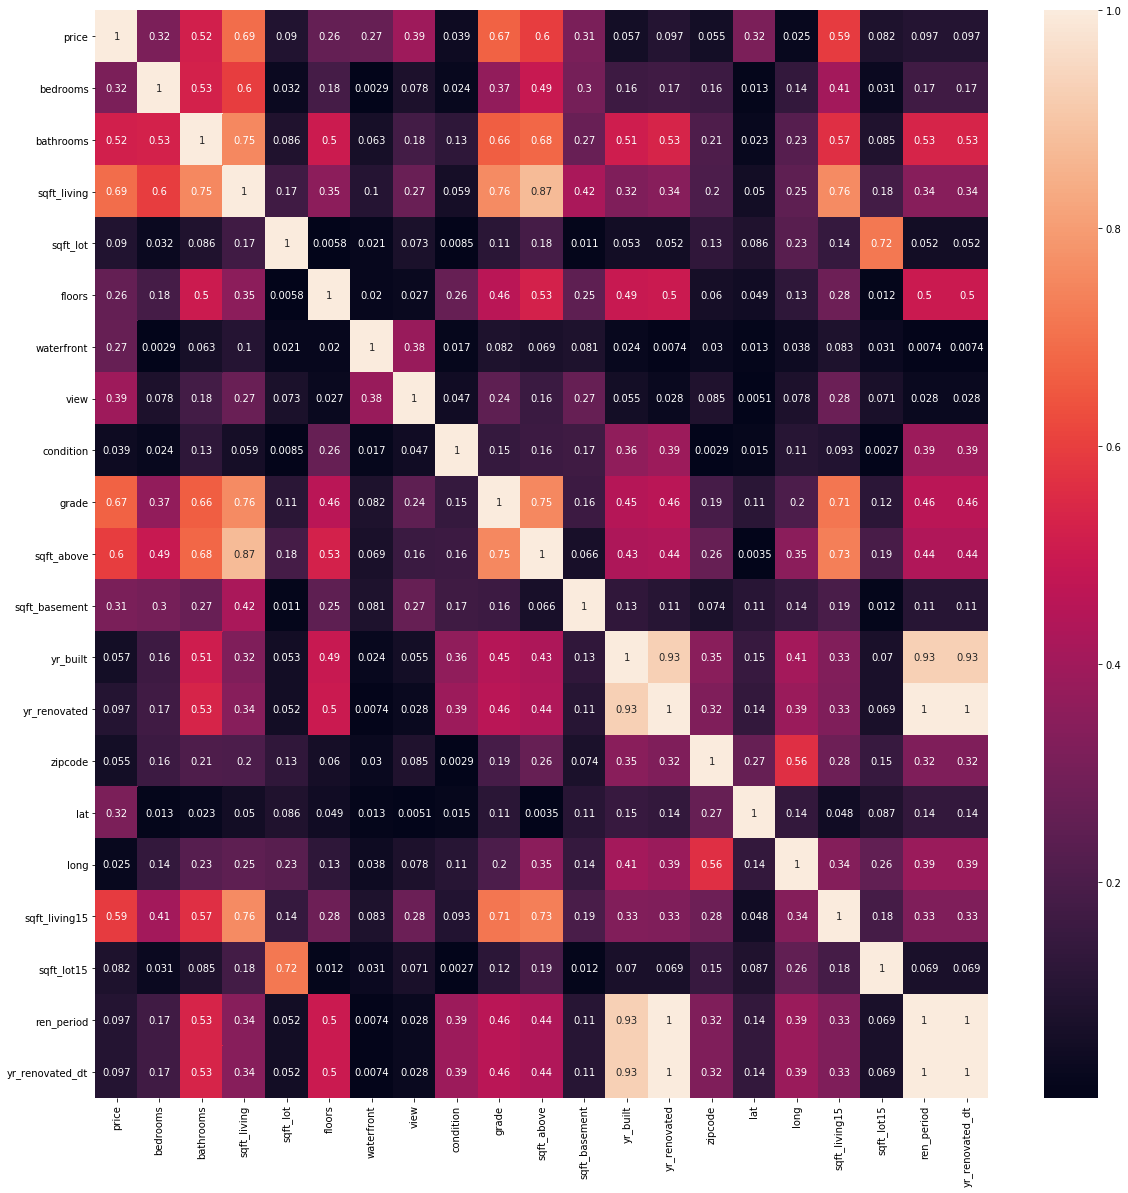

In [21]:
corr = dff_working.corr()
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(corr), annot=True,)
plt.show()

In the heatmap above we can see that there are a few features that are multicolinear with many others.  
We will attempt to engineer some features from those to see if they can still be effective.  
'sqft_living' and 'grade' have a high correlation, so we will combine them into one feature.

In [22]:
np.corrcoef(dff_working.bedrooms, dff_working.sqft_living)

array([[1.        , 0.59577096],
       [0.59577096, 1.        ]])

In [23]:
weights = np.linspace(0, 1, 10000)
max_corr = -1
desired_weights = None
for weight in weights:
    weight1 = weight
    weight2 = 1 - weight
    vals = weight1*dff_working.bedrooms + weight2*dff_working.sqft_living
    corr_coeff = np.abs(np.corrcoef(vals, dff_working.price))[0][1]
    if corr_coeff > max_corr:
        desired_weights = [weight1, weight2]
        max_corr = corr_coeff
desired_weights

[0.0, 1.0]

In [24]:
dff_working['sqft_living_bedrooms'] = desired_weights[0]*dff_working.bedrooms + desired_weights[1]*dff_working.sqft_living

In [25]:
cols = ['sqft_living_bedrooms']
hf.make_ols_model(df=dff_working, columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 1.163e+05
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:51:11   Log-Likelihood:            -2.9920e+05
No. Observations:               21577   AIC:                         5.984e+05
Df Residuals:                   21576   BIC:                         5.984e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sqft_living_bedrooms   261.1798 

(<statsmodels.regression.linear_model.OLS at 0x28ee9849c18>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x28ee9849fd0>)

In [26]:
np.corrcoef(dff_working.bathrooms, dff_working.grade)

array([[1.       , 0.6629932],
       [0.6629932, 1.       ]])

In [27]:
weights = np.linspace(0, 1, 10000)
max_corr = -1
desired_weights = None
for weight in weights:
    weight1 = weight
    weight2 = 1 - weight
    vals = weight1*dff_working.bathrooms + weight2*dff_working.grade
    corr_coeff = np.abs(np.corrcoef(vals, dff_working.price))[0][1]
    if corr_coeff > max_corr:
        desired_weights = [weight1, weight2]
        max_corr = corr_coeff
desired_weights

[0.25982598259825984, 0.7401740174017402]

In [28]:
dff_working['grade_bathroom'] = desired_weights[0]*dff_working.bathrooms + desired_weights[1]*dff_working.grade

In [29]:
cols = ['grade_bathroom']
hf.make_ols_model(df=dff_working, columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                 7.755e+04
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:52:02   Log-Likelihood:            -3.0276e+05
No. Observations:               21577   AIC:                         6.055e+05
Df Residuals:                   21576   BIC:                         6.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
grade_bathroom  9.044e+04    324.769    278.

(<statsmodels.regression.linear_model.OLS at 0x28ef4182278>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x28ef0079208>)

In [30]:
features = dff_working.drop(columns=['bedrooms', 'bathrooms', 'view', 'grade', 'sqft_living', 'floors', 'sqft_above', 'sqft_lot15', 'yr_built', 'yr_renovated', 'yr_renovated_dt', 'sqft_living15', 'lat', 'long', 'zipcode'])
features.head()

,date,price,sqft_lot,waterfront,condition,sqft_basement,ren_period,date_dt,sqft_living_bedrooms,grade_bathroom
0,10/13/2014,221900.0,5650,0.0,3,0.0,60.0,2014-10-13,1180.0,5.441044
1,12/9/2014,538000.0,7242,0.0,3,400.0,24.0,2014-12-09,2570.0,5.765827
2,2/25/2015,180000.0,10000,0.0,3,0.0,82.0,2015-02-25,770.0,4.700870
3,12/9/2014,604000.0,5000,0.0,5,910.0,50.0,2014-12-09,1960.0,5.960696
4,2/18/2015,510000.0,8080,0.0,3,0.0,28.0,2015-02-18,1680.0,6.441044


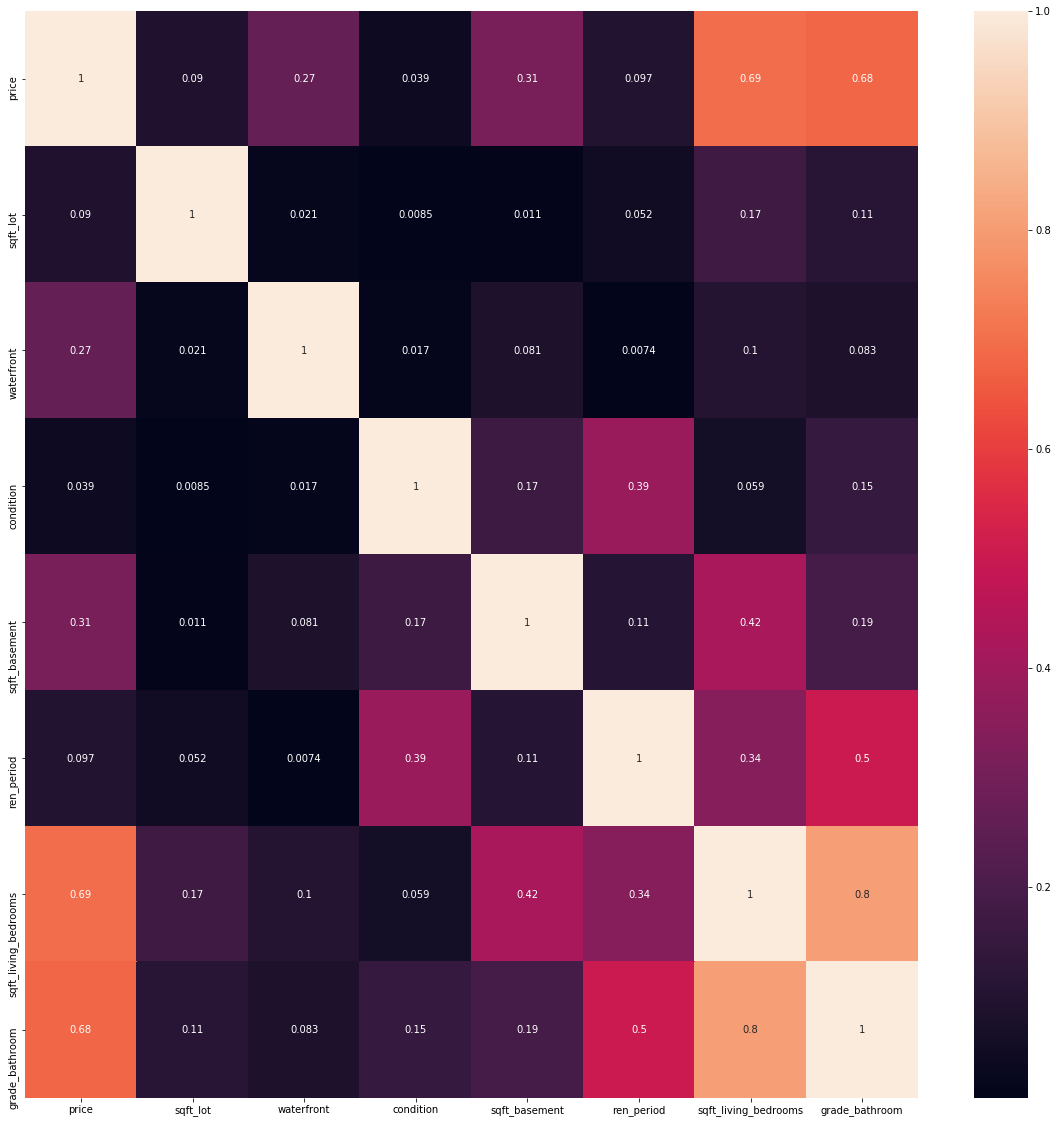

In [31]:
corr = features.corr()
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(corr), annot=True,)
plt.show()

In [32]:
cols = ['ren_period', 'grade_bathroom', 'condition']
hf.make_ols_model(df=features, target='price', columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                 2.824e+04
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:52:08   Log-Likelihood:            -3.0200e+05
No. Observations:               21577   AIC:                         6.040e+05
Df Residuals:                   21574   BIC:                         6.040e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
ren_period      1338.4405     79.747     16.

(<statsmodels.regression.linear_model.OLS at 0x28ef42687b8>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x28ef42687f0>)

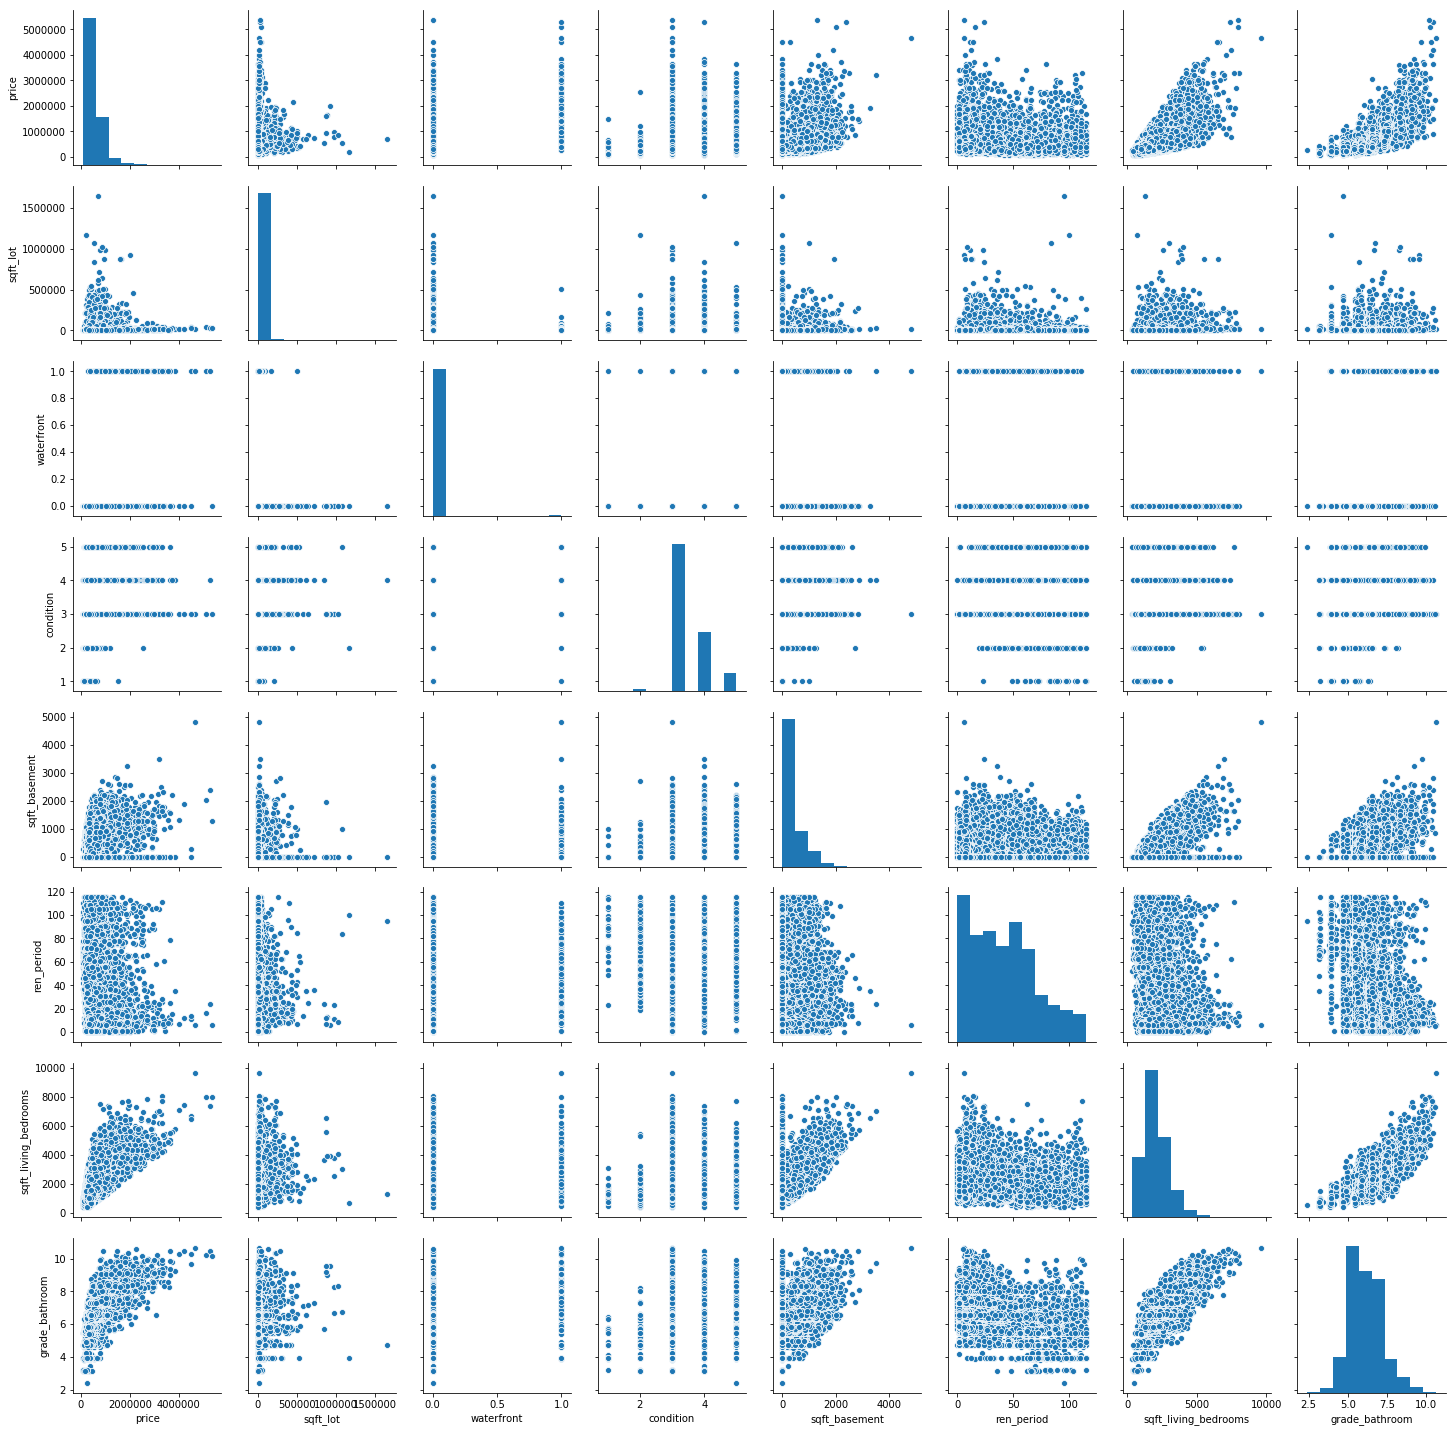

In [33]:
sns.pairplot(data=features)

In [47]:
# Much of the data seems to be not normal.  
# We will perform a log transformation in an effort to normalize the data
features_treated = pd.DataFrame([])

In [48]:
features_treated['price'] = np.log(features['price'])
features_treated['sqft_lot'] = np.log(features['sqft_lot'])
features_treated['sqft_living_bedrooms'] = np.log(features['sqft_living_bedrooms'])
features_treated['grade_bathroom'] = np.log(features['grade_bathroom'])
features_treated['ren_period'] = np.log(features['ren_period'])
#features_treated['sqft_basement'] = np.log(features['sqft_basement'])

Text(0.5, 1.0, 'Price vs 1st group of column variables')

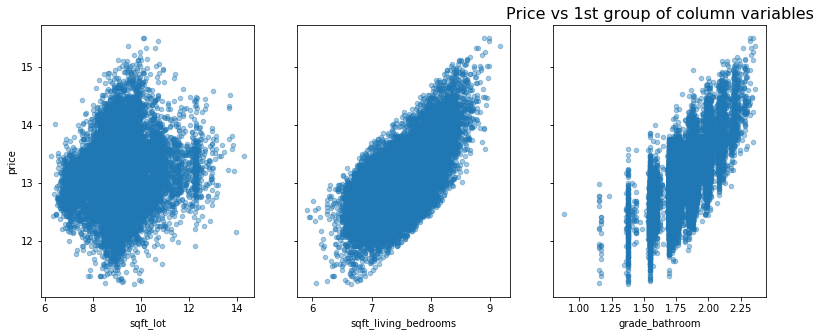

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,5))
for xcol, ax in zip(list(features_treated)[1:4], axes):
                    features_treated.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=.4, sharey=True)

plt.title('Price vs 1st group of column variables', fontsize = 16)

Text(0.5, 1.0, 'Price vs 1st group of column variables')

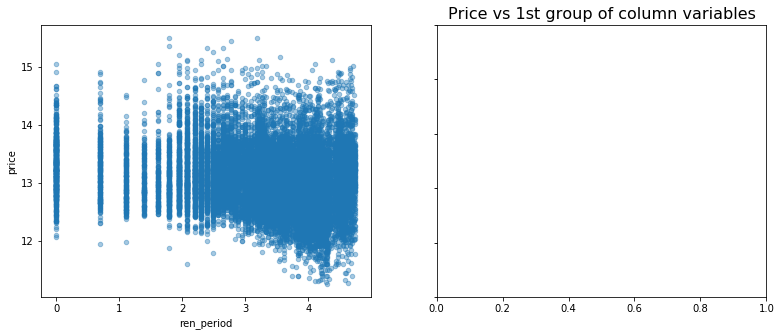

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
for xcol, ax in zip(list(features_treated)[4:6], axes):
                    features_treated.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=.4, sharey=True)

plt.title('Price vs 1st group of column variables', fontsize = 16)

#### This seems to have made a difference in the data.

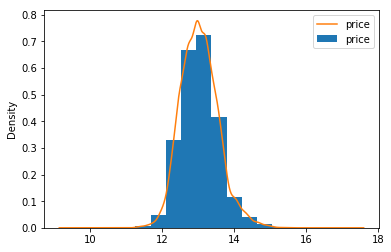

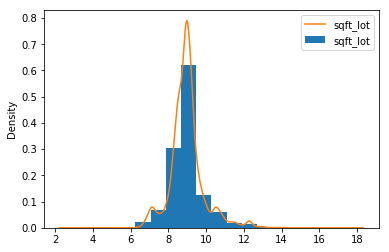

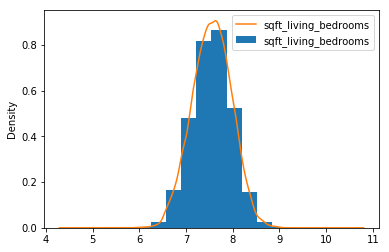

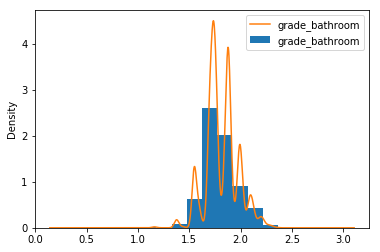

ValueError: autodetected range of [-inf, 4.74493212836325] is not finite

In [51]:
cols = ['price', 'sqft_lot', 'sqft_living_bedrooms', 'grade_bathroom', 'ren_period', 'sqft_basement']
hf.make_kde(data=features_treated, columns=cols)

### From this plot, we have learned<br>
- __*'sqft_living'*__ will be a good predictor<br>
- __*'Sqft_lot'*__ may be affecting the results adversely<br>
- __*'bedrooms'*__ looks significant as well as __*'bathrooms'*__<br>


### There are many categorical variables, so we need to handle those here
- We will change them to categories
- Perform One_Hot encoding to normalize the data

### Here we are dealing with the categorical values and making them easier to work with

In [ ]:
bins = [0, 2, 3, 4, 5]

bins_condition = pd.cut(features['condition'], bins)
bins_condition = bins_condition.cat.as_unordered()

In [41]:

dummy_condition = pd.get_dummies(bins_condition, prefix="COND", drop_first=True)
#dummy_waterfront = pd.get_dummies(bins_waterfront, prefix="WATER", drop_first=True)
features_final = pd.concat([dummy_condition], axis=1)

In [42]:
features_final.head()

,"COND_(2, 3]","COND_(3, 4]","COND_(4, 5]"
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [45]:
cols = ['price', 'sqft_lot', 'sqft_living_bedrooms', 'grade_bathroom', 'ren_period', 'sqft_basement']
for col in cols:
    features_final[col] = features_treated[col]
features_final.head()

,"COND_(2, 3]","COND_(3, 4]","COND_(4, 5]",price,sqft_lot,sqft_living_bedrooms,grade_bathroom,ren_period,sqft_basement
0,1,0,0,12.309982,8.639411,7.073270,1.693971,4.094345,-inf
1,1,0,0,13.195614,8.887653,7.851661,1.751949,3.178054,5.991465
2,1,0,0,12.100712,9.210340,6.646391,1.547748,4.406719,-inf
3,0,0,1,13.311329,8.517193,7.580700,1.785187,3.912023,6.813445
4,1,0,0,13.142166,8.997147,7.426549,1.862691,3.332205,-inf


### The dummy values created column names which contain characters that do not agree with coding<br>
- they are being modified below.

### Now that we have the data organized, lets start looking at the relationships.

ValueError: supplied range of [-inf, 4.74493212836325] is not finite

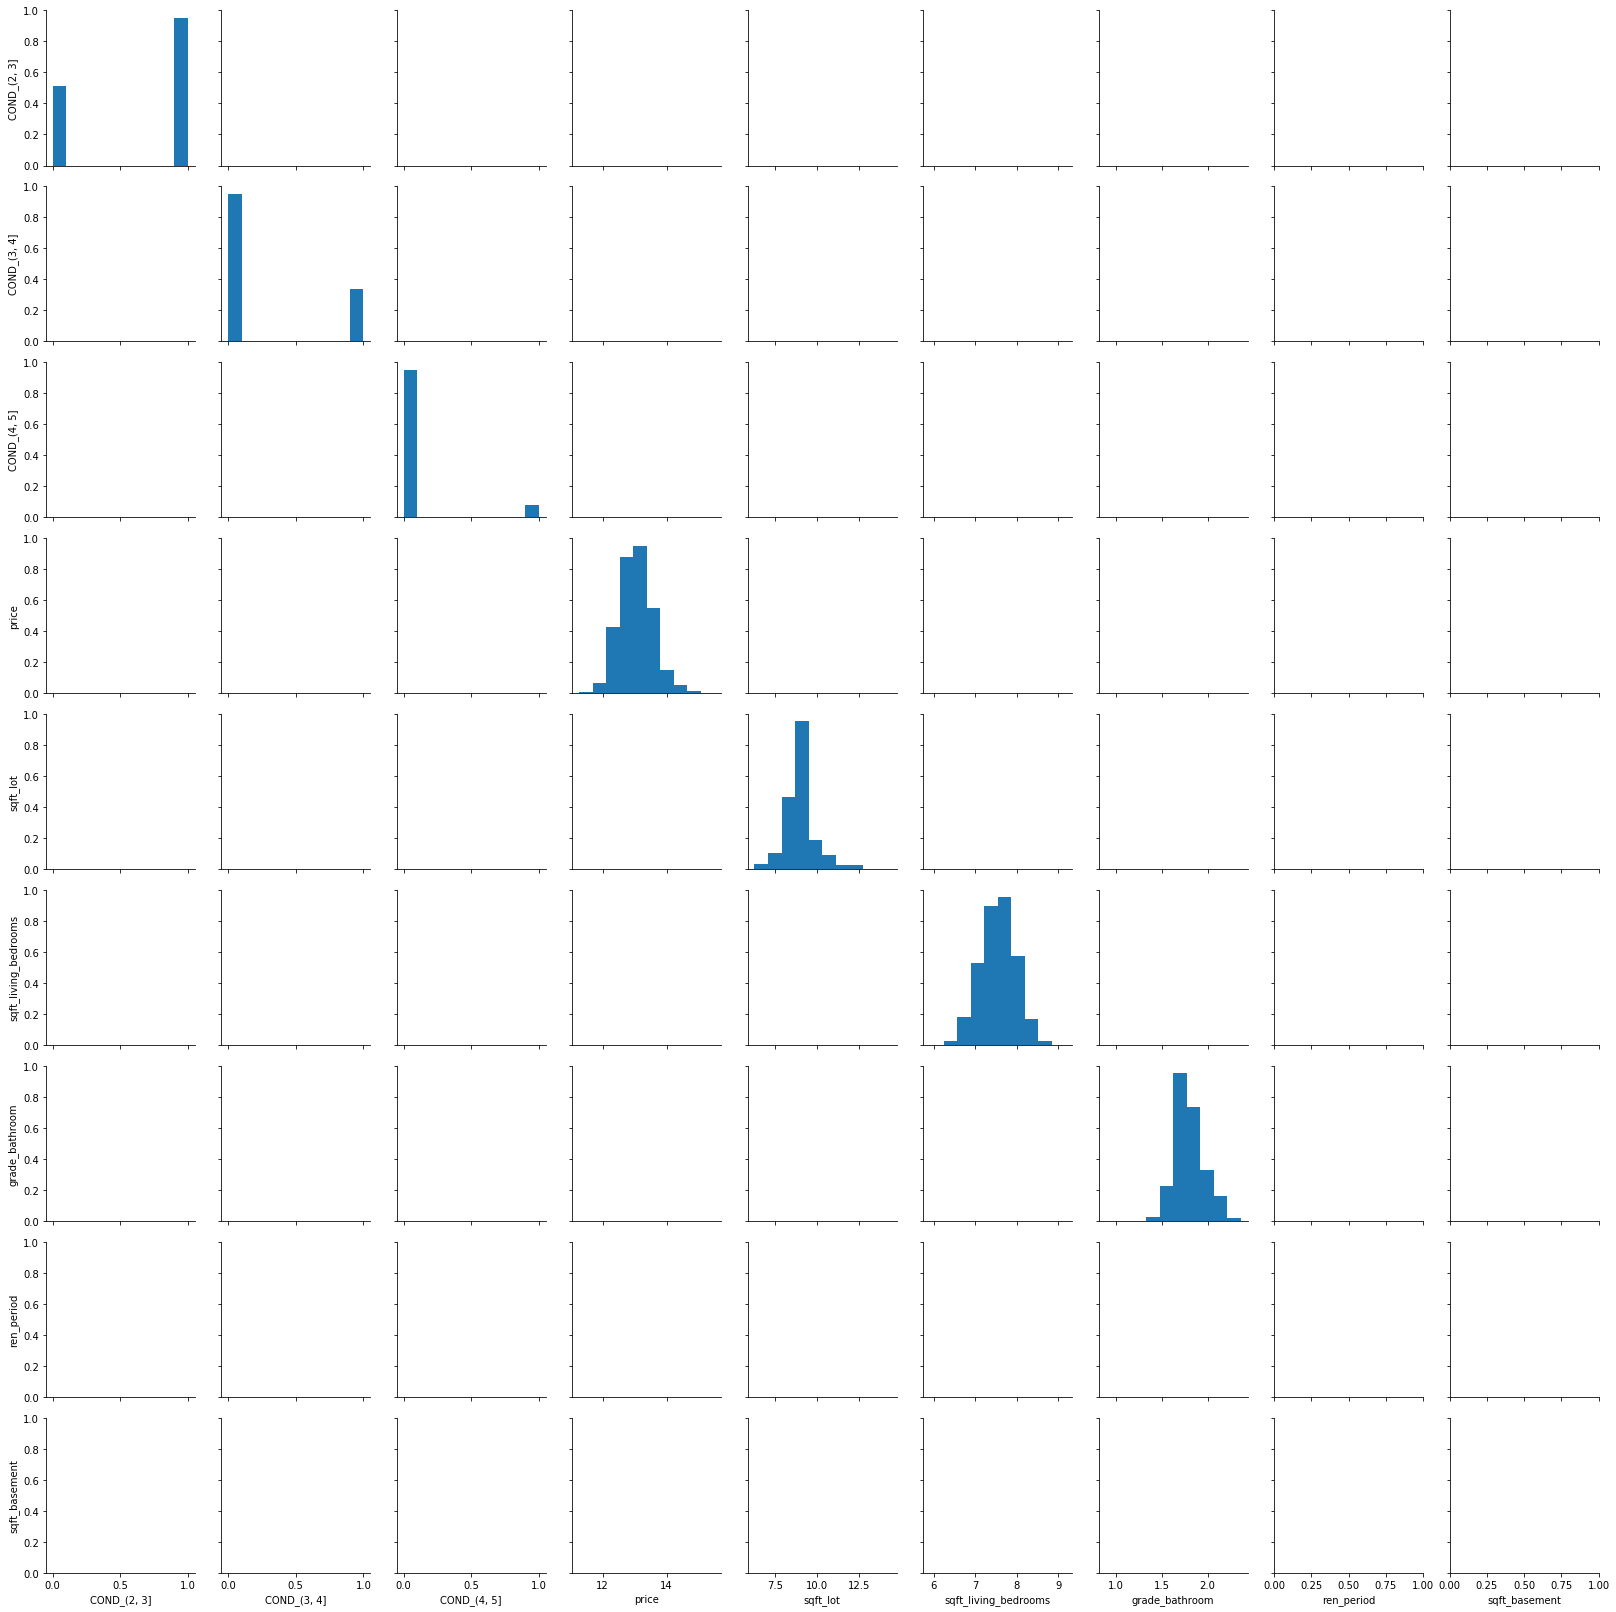

In [46]:
sns.pairplot(features_final)

In [ ]:
#### looks like we have some outliers that may be skewing the data.  We will take a look at that here:
removedf = df_final.loc[(df_final.sqft_bath > 10000) & (df_final.price > 500000)]
df_test = df_sqft_bath.iloc[(index not in removedf.index for index in df_final.index)]
sns.lmplot(x='price', y='sqft_bath', data=df_test)

In [ ]:
df_final.head()

In [ ]:
for column in ['log_sqft_lot', 'log_yr_built', 'sqft_bath', 'sqft_grade']:
    df_final[column].plot.hist(normed=True, color='lightblue' )
    df_final[column].plot.kde(label=column, color='darkblue' )
    plt.legend()
    plt.show()

In [ ]:
for column in ['log_sqft_lot', 'log_yr_built', 'sqft_bath', 'sqft_grade']:
    sns.lmplot(x=column, y="price",
                  data=df_final)
    plt.show()

In [ ]:
df_final.fillna(0, inplace=True)
df_final = df_final['sqft_grade'].fillna(0)

In [ ]:
#df_final.drop(['bed1', 'bed2', 'bed4'], axis=1, inplace=True)

In [ ]:
# x = df_final['price']
# y = df_final['water1']
# sns.catplot(x=x, y=y,
#             kind="box", dodge=False, data=df_final);

In [ ]:
corr = df_final.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,)
plt.show()

In [ ]:
df_final.head()

In [ ]:
col_names = df_final.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_final).fit()
    X_new = pd.DataFrame({val: [df_final[val].min(), df_final[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

In [ ]:
pd.DataFrame(results)

In [ ]:
y = df_final[['price']]
X = df_final.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

In [ ]:
linreg.fit(X_train, y_train)

In [ ]:
print(linreg.intercept_)

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(metrics.mean_squared_error(y_train, y_hat_train))
    test_err.append(metrics.mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [ ]:
cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [ ]:
print(cv_5_results)

In [ ]:
df_final.head()

In [ ]:

y = df_final.price
X = df_final.logsqft_living
sm.add_constant(X)
sm.OLS(y, X).fit()
results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
pd.DataFrame(results)


In [ ]:
target = 'price'
x_cols = df_final.drop('price', axis=1).columns
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=df_final).fit()
model.summary()

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(df.price, df.lat,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(df.price, df.long,
                 cmap="Blues", shade=True, shade_lowest=False)

### Model building

In [ ]:
ols, summary = ols_model(dff_working, columns_to_use=['sqft_living', 'grade'], add_constant=False)

In [ ]:
ols.fit().summary()

### The best model
* normal distributions of data going in
* scaled data (if you choose to do so)

In [ ]:
dff_working['log_sqft_living'] = np.log(dff_working['sqft_living'])

In [ ]:
plt.hist(dff_working.sqft_living)
plt.show()
plt.hist(dff_working.log_sqft_living)
plt.show()

In [ ]:
ols, summary = ols_model(df=dff_working, columns_to_use=['log_sqft_living', 'grade'], add_constant=False)
ols.fit().summary()